BFGS迭代次数:51 耗时:0.59375
DFP迭代次数:51 耗时:0.1875


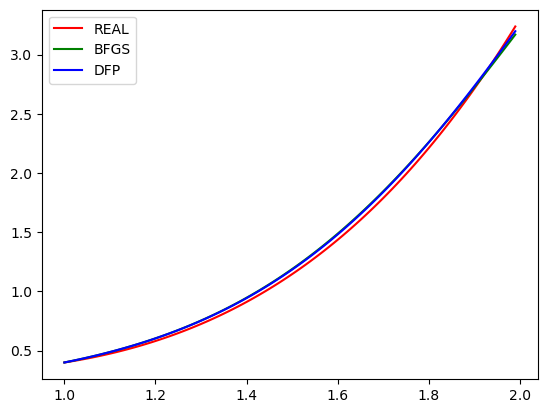

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
import time
def equation(x,y):
    return x**3-y/x  # 第一个方程dy/dx

def grad(func,xk):
    '''
    :param func: 目标函数
    :param xk: 列向量
    :return: func在xk处梯度grad(数值估计方法）
    '''
    delta=0.00001
    grad=[]
    n=np.size(xk)
    for i in range(0,n):
        x=[]
        for j in range(0,n):
            x.append(xk[j,0])
        x[i]=xk[i,0]+delta # 第i个分量微变
        grad.append((func(np.mat(x).T)-func(xk))/delta)
    return np.mat(grad).T


def phi(x,omega,theta):
    # Sigmoid型激活函数phiz
    z = omega*x-theta
    return 1/(1+math.exp(-z))

def yt(x,p):
    # 前馈神经网络输出yt
    n = int(np.size(p)/3)
    N = 0 # 初始条件
    for i in range(0,n):
        N += p[n+i,0]*phi(x,p[i,0],p[2*n+i,0])
    return N

def opti_prob(func,p,m):
    # 导出最优化问题res_prob
    delta = 0.0001
    x = []
    gradx = []  # 对x的偏导
    res_prob = 0
    # 取区间【1,2】上均匀的值
    for i in range(0,m):
        x.append(1+i/(m+1))
        gradx.append((yt(x[i]+delta,p)-yt(x[i],p))/delta)
        res_prob += (gradx[i]-func(x[i],yt(x[i],p)))**2
    return np.float64(res_prob)

def BFGS(func, xk, epsilon):
   '''
    BFGS方法
    :param func:函数
    :param xk:初始点
    :param epsilon:精度
    :return: 最优解 x*
   '''
   start = time.process_time()
   maxk = 0
   n = np.size(xk)
   H = np.mat(np.eye(n))
   while np.linalg.norm(grad(func, xk)) > epsilon:
        maxk += 1
        dk = -H.dot(grad(func, xk))
        alpha = Armijo(func, xk, dk,0.8)
        sk = alpha*dk
        yk = grad(func, xk + alpha * dk) - grad(func, xk)
        if yk.T.dot(sk) == 0:
            H = np.eye(n)
        elif yk.T.dot(sk)>0:
            # 式3.31求Bk
            H = H+(1+np.linalg.norm((yk.T.dot(H).dot(yk))/(yk.T.dot(sk))))*((sk.dot(sk.T))/np.linalg.norm(yk.T.dot(sk)))-((sk.dot(yk.T).dot(H))+(H.dot(yk).dot(sk.T)))/np.linalg.norm(yk.T.dot(sk))
        xk = xk + alpha * dk
        if maxk > 50:
            break
   end = time.process_time() - start
   print(f'BFGS迭代次数:{maxk} 耗时:{end}\n')
   return xk


def DFP(func, xk, epsilon):
    '''
     DFP法
    :param func:目标函数
    :param xk:初始点
    :param epsilon:epsilon
    :return: 最优解 x*
    '''
    start = time.process_time()
    maxk = 0
    n = np.size(xk)
    H = np.mat(np.eye(n))
    while(np.linalg.norm(grad(func, xk)) > epsilon):
        maxk += 1
        dk = -H.dot(grad(func, xk))
        alpha = Armijo(func, xk, dk,0.5)
        sk = alpha*dk
        yk = grad(func, xk + alpha * dk) - grad(func, xk)
        if np.linalg.norm(sk.T.dot(yk)) == 0 or np.linalg.norm(yk.T.dot(H)) == 0:
            H = np.eye(n)
        else:
            H = H+(sk.dot(sk.T))/np.linalg.norm(sk.T.dot(yk))-(H.dot(yk).dot(yk.T).dot(H))/np.linalg.norm(yk.T.dot(H).dot(yk))
        xk = xk + alpha * dk
        if maxk > 50:
            break
    end = time.process_time() - start
    print(f'DFP迭代次数:{maxk} 耗时:{end}\n')
    return xk

def Armijo(f,xk,dk,rho):
    '''
   用Armijo算法求步长
   f:函数
   xk:函数原始点
   dk：原始方向向量
   rho:rho
   '''
    alpha=1
    xnext=xk+alpha*dk
    while(f(xnext)>f(xk)+rho*alpha*grad(f,xk).T.dot(dk)):
        alpha=rho*alpha
        xnext = xk + alpha * dk
    return alpha

 # 项目从此处开始运行
lst=[]
n=3
m=5
s=3*n
for i in range(0,s):
    lst.append(2*i)
p0=np.mat(lst).T
def F(p):
    return opti_prob(equation,p,m)
P_BFGS=BFGS(F, p0, 0.0001)   #BFGS
P_DFP=DFP(F, p0, 0.0001)     #DFP

#画图
y_real = []
y_DFP = []
y_BFGS = []

for i in range(100,200,1):
    y_real.append(((i/100)**4)/5+1/(5*i/100))
    y_DFP.append(yt(i / 100, P_DFP) + 0.4 - yt(1, P_DFP))
    y_BFGS.append(yt(i / 100, P_BFGS) + 0.4 - yt(1, P_BFGS))
    x_array=np.arange(1,2,0.01)
y_real_array=np.array(y_real)
y_DFP_array = np.array(y_DFP)
y_BFGS_array=np.array(y_BFGS)
plt_real = plt.plot(x_array, y_real_array, 'r', label='REAL')
plt_BFGS = plt.plot(x_array,y_BFGS_array,'g',label='BFGS')
plt_DFP = plt.plot(x_array, y_DFP_array, 'b', label='DFP')
plt.legend(loc=0)
plt.show()
